In [1]:
# Standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interactive, IntProgress
from IPython.display import display
from scipy.stats import mannwhitneyu, wilcoxon

# Append base directory
import os,sys,inspect
rootname = "pub-2020-exploratory-analysis"
thispath = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootpath = os.path.join(thispath[:thispath.index(rootname)], rootname)
sys.path.append(rootpath)
print("Appended root directory", rootpath)

from mesostat.utils.qt_helper import gui_fnames, gui_fpath
from lib.gallegosalas.data_fc_db_sessional import DataFCDatabase
from mesostat.metric.metric import MetricCalculator
from mesostat.utils.plotting import imshow

%load_ext autoreload
%autoreload 2

Appended root directory /home/alyosha/work/git/pub-2020-exploratory-analysis


In [2]:
params = {}
# params['root_path_data']  = gui_fpath("Path to data collection",  './')
params['root_path_data'] = '/media/alyosha/Data/TE_data/yasirdata2/'

In [3]:
dataDB = DataFCDatabase(params)

Reading channel label file
Reading allen brain map
Reading task structure
Searching for data files


In [4]:
dataDB.read_neuro_files()
len(dataDB.dataNeuronal)

IntProgress(value=0, description='Read Neuro Data:', max=42)

42

# Mono-Regional Metrics

* Dynamic Regime
    * SNR - via AutoCorr[1]
    * Saturation regime - via phase-space scatter
    * Identify speed of evolution by estimating exp decay timescale for each dataset.
        - Find timescale that minimizes AutoCorr[1]
* Temporal structure
    * Individual temporal specificity (regions more active later vs earlier)
        - Test activity for each timestep vs cycle null model, plot significant bins
    * Individual temporal stability (how consistent is the activity over trials)
        - Test activity for each timestep vs cycle null model, plot -log(p) for ranksum
* Specificity to external observables (movement, action, learning)
    - Test activity for each timestep for hit/miss, (separate naive/expert)
    - Scatter temporal mean vs performance 

## 1.1 SNR via AutoCorrelation

**Plan:**
* AutoCorr[1] is a number that is close to 1 if data is changing slowly, and close to zero if data changes very fast.

doing mouse m9abs
doing mouse m9dff


/opt/anaconda3/envs/py36nest/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


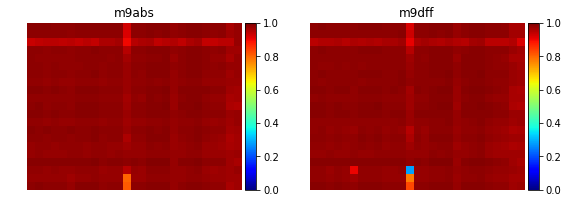

In [5]:
mc = MetricCalculator(serial=True, verbose=False)

fig, ax = plt.subplots(ncols=len(dataDB.mice), figsize=(4*len(dataDB.mice),4), tight_layout=True)
for iMouse, mousename in enumerate(sorted(dataDB.mice)):
    print('doing mouse', mousename)
    rows = dataDB.get_rows('neuro', {'mousename' : mousename})
    
    rez = []
    for idx, row in rows.iterrows():
        mc.set_data(dataDB.dataNeuronal[idx], 'rps', zscoreDim=None)
        rez += [mc.metric3D('autocorr_d1', 'p', metricSettings=None, sweepSettings=None)]
        
    imshow(fig, ax[iMouse], rez, title=mousename, cmap='jet', limits=[0,1], haveColorBar=True)
plt.show()

# 2. Activity

m9abs 1838.1438712057095 48231.27024748579
m9dff -1.0997857383339453 1.3243664604488006


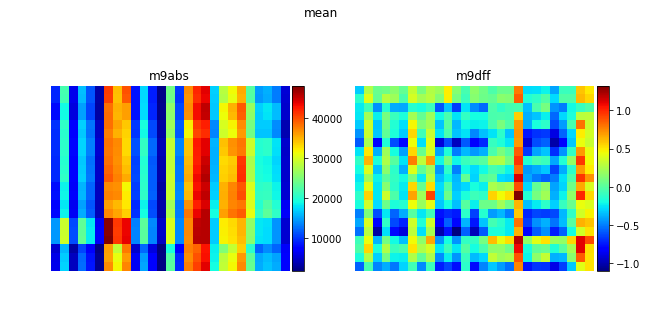

m9abs 6.2964279968056305 1525.122755659068
m9dff 0.1297087304999336 3.4972730939487624


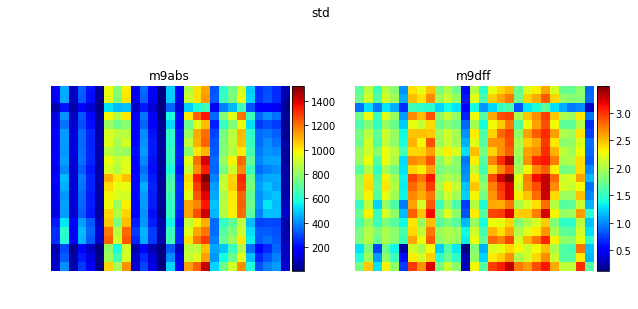

m9abs 4.190172867494625 12.438016879085879
m9dff -0.9158921987240053 3.6829330345310263


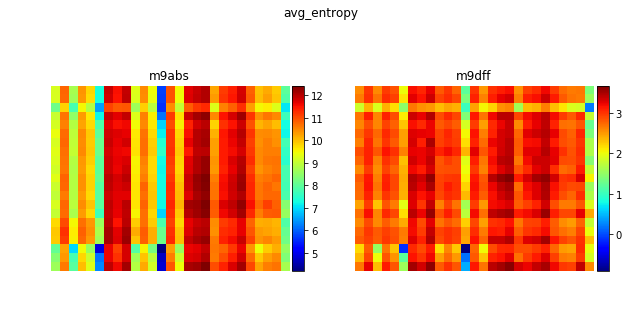

In [6]:
mc = MetricCalculator(serial=True, verbose=False)

for metricName in ['mean', 'std', 'avg_entropy']:
    fig, ax = plt.subplots(ncols=len(dataDB.mice), figsize=(5 * len(dataDB.mice),5))
    fig.suptitle(metricName)
    for iMouse, mousename in enumerate(sorted(dataDB.mice)):
        rows = dataDB.get_rows('neuro', {'mousename' : mousename})

        rez = []
        for idx, row in rows.iterrows(): 
            session = row['session']

            mc.set_data(dataDB.dataNeuronal[idx], "rps")
            rez += [mc.metric3D(metricName, "p")]

        print(mousename, np.min(rez), np.max(rez))
        
        imshow(fig, ax[iMouse], np.array(rez), xlabel='sessions', ylabel='channels', title=mousename, haveColorBar=True, cmap='jet')
    plt.savefig(metricName + '.svg')
        
    plt.show()

# 3. Temporal Structure
## 3.1 Temporal specificity

doing mouse m9abs
..session 20180301a; took time 0.280900239944458
..session 20180301b; took time 0.2821507453918457
..session 20180302b; took time 0.27306318283081055
..session 20180302c; took time 0.2804744243621826
..session 20180305a; took time 0.2898280620574951
..session 20180305b; took time 0.2708473205566406
..session 20180306a; took time 0.27963757514953613
..session 20180306b; took time 0.3061830997467041
..session 20180307a; took time 0.2734365463256836
..session 20180307b; took time 0.2814452648162842
..session 20180307c; took time 0.27712035179138184
..session 20180308a; took time 0.279094934463501
..session 20180308b; took time 0.26858949661254883
..session 20180309a; took time 0.27653050422668457
..session 20180309b; took time 0.2853226661682129
..session 20180313a; took time 0.30686044692993164
..session 20180313b; took time 0.2835404872894287
..session 20180313c; took time 0.2784457206726074
..session 20180315a; took time 0.27390408515930176
..session 20180316a; took t

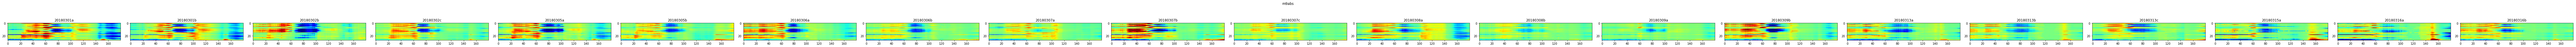

doing mouse m9dff
..session 20180301a; took time 0.2746114730834961
..session 20180301b; took time 0.3139159679412842
..session 20180302b; took time 0.2920839786529541
..session 20180302c; took time 0.30638790130615234
..session 20180305a; took time 0.29181718826293945
..session 20180305b; took time 0.29679203033447266
..session 20180306a; took time 0.3262622356414795
..session 20180306b; took time 0.2791554927825928
..session 20180307a; took time 0.2826969623565674
..session 20180307b; took time 0.2900099754333496
..session 20180307c; took time 0.27875256538391113
..session 20180308a; took time 0.2871277332305908
..session 20180308b; took time 0.2903017997741699
..session 20180309a; took time 0.2796132564544678
..session 20180309b; took time 0.2742323875427246
..session 20180313a; took time 0.27376461029052734
..session 20180313b; took time 0.2741575241088867
..session 20180313c; took time 0.2728605270385742
..session 20180315a; took time 0.27788877487182617
..session 20180316a; took 

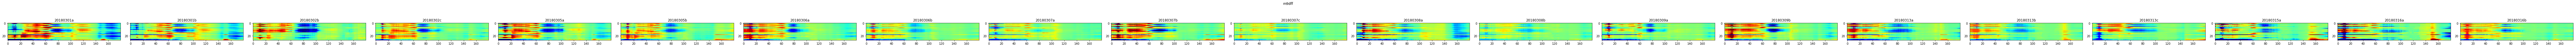

In [23]:
import multiprocessing
from time import time

def task2(data2D):
    dataTmp = data2D - np.mean(data2D)
    
    nTime = data2D.shape[1]
    rez = np.zeros(nTime)

    for iTime in range(nTime):
        T, pval = wilcoxon(dataTmp[:, iTime])
#         rez[iTime] = np.sign(np.mean(dataTmp[:, iTime])) * int(pval < 0.01 / nTime)
        rez[iTime] = np.sign(np.mean(dataTmp[:, iTime])) * (-np.log10(pval))
    return rez
    

# Parallel stuff
pool = multiprocessing.Pool(processes=4)

for iMouse, mousename in enumerate(sorted(dataDB.mice)):
    print('doing mouse', mousename)
    rows = dataDB.get_rows('neuro', {'mousename' : mousename})
    
    fig, ax = plt.subplots(ncols=len(rows), figsize=(6*len(rows), 3), tight_layout=True)
    fig.suptitle(mousename)
    
    for iPlot, (idx, row) in enumerate(rows.iterrows()):
        session = row['session']
        print('..session', session, end='')
        timeStart = time()

        data = dataDB.dataNeuronal[idx]
        dataTmp = data.transpose((1,0,2))
        rez = np.array(pool.map(task2, dataTmp))

#         ax[iPlot].imshow(rez, vmin=-1.1, vmax=1.1, cmap='jet')
        ax[iPlot].imshow(rez, vmin=-10, vmax=10, cmap='jet')
        ax[iPlot].set_title(session)

        print('; took time', time() - timeStart)
    plt.show()
    
pool.terminate()
pool.join()

# 4. Behaviour-Specific performance

## 4.1 Temporal mean vs learning

doing mouse m9abs
doing mouse m9dff


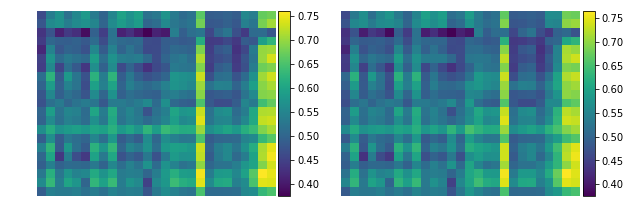

In [25]:
fig, ax = plt.subplots(ncols=len(dataDB.mice), figsize=(5 * len(dataDB.mice),5))
for iMouse, mousename in enumerate(sorted(dataDB.mice)):
    print('doing mouse', mousename)
    rows = dataDB.get_rows('neuro', {'mousename' : mousename})
    
    rez = []
    for idx, row in rows.iterrows():
        mc.set_data(dataDB.dataNeuronal[idx], 'rps', zscoreDim=None)
        rez += [mc.metric3D('ord_mean', 'p', metricSettings=None, sweepSettings=None)]

    imshow(fig, ax[iMouse], rez, haveColorBar=True)
    
plt.show()